### 과제 3

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('../dataset/data.csv',index_col=0)
data.info()

# Age / Potential / Special / Skill Moves / Acceleration / Penalties / Wage (문자화 되어있어서 숫자화 시켜야 함)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [4]:
data.Wage.value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€190K       1
€235K       1
€93K        1
€405K       1
€565K       1
Name: Wage, Length: 144, dtype: int64

In [33]:
import re                # 정규 표현 모듈: 스트링에서 패턴을 찾거나, 패턴을 결합하거나, 스트링을 줄일 수 있습니다.

def get_num(x):
    result = int(re.sub('[^0-9]','',x))      # 0-9: 모든 숫자를 의미. ^ 아닌 것. 즉, ^0-9 : 숫자가 아닌 것은 ''공백으로 바꾸겠다는 것. 
    return result                           # re.sub(pattern, replace, text)
data['Nwage'] = data.Wage.apply(lambda x:get_num(x))
data[['Wage','Nwage']].head()

# 너무 범위가 넓으니까 100 이상?

df_w = data[data['Nwage'] >= 100]
df_w.count()

ID                188
Name              188
Age               188
Photo             188
Nationality       188
                 ... 
GKPositioning     188
GKReflexes        188
Release Clause    180
Nwage             188
wage_o            188
Length: 90, dtype: int64

In [36]:
df = df_w[['Age','Potential','Special','International Reputation','Skill Moves','Acceleration','Penalties','Nwage']]
df.head()

,Age,Potential,Special,International Reputation,Skill Moves,Acceleration,Penalties,Nwage
0,31,94,2202,5.0,4.0,91.0,75.0,565
1,33,94,2228,5.0,5.0,89.0,85.0,405
2,26,93,2143,5.0,5.0,94.0,81.0,290
3,27,93,1471,4.0,1.0,57.0,40.0,260
4,27,92,2281,4.0,4.0,78.0,79.0,355


In [37]:
df.corr()

,Age,Potential,Special,International Reputation,Skill Moves,Acceleration,Penalties,Nwage
Age,1.000000,-0.317944,0.007926,0.523590,-0.217818,-0.268202,0.040695,0.197055
Potential,-0.317944,1.000000,0.005861,0.303659,0.036192,0.209823,0.006111,0.543325
Special,0.007926,0.005861,1.000000,0.131599,0.685655,0.556154,0.771906,0.270249
International Reputation,0.523590,0.303659,0.131599,1.000000,0.044101,0.017102,0.247528,0.551203
Skill Moves,-0.217818,0.036192,0.685655,0.044101,1.000000,0.691870,0.666188,0.177080
Acceleration,-0.268202,0.209823,0.556154,0.017102,0.691870,1.000000,0.453910,0.192706
Penalties,0.040695,0.006111,0.771906,0.247528,0.666188,0.453910,1.000000,0.244612
Nwage,0.197055,0.543325,0.270249,0.551203,0.177080,0.192706,0.244612,1.000000


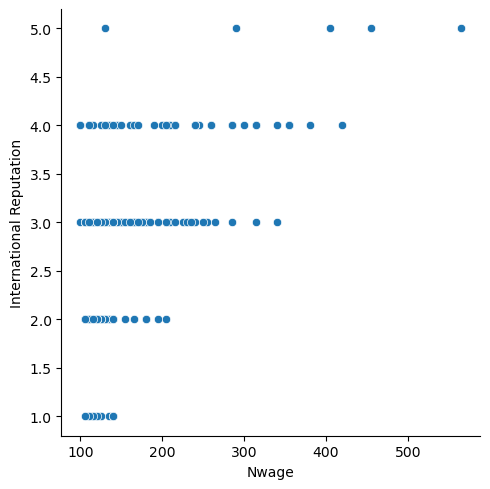

In [44]:
import seaborn as sns

sns.relplot(data = df, x = 'Nwage', y = 'International Reputation')

<AxesSubplot:xlabel='Nwage', ylabel='International Reputation'>

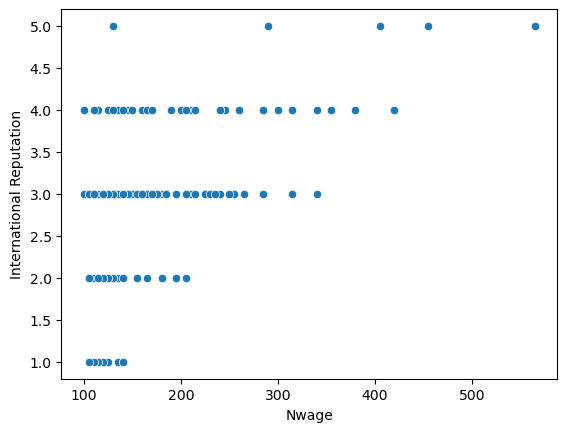

In [50]:
sns.scatterplot(x='Nwage',y='International Reputation',data=df)

<AxesSubplot:xlabel='Nwage', ylabel='Potential'>

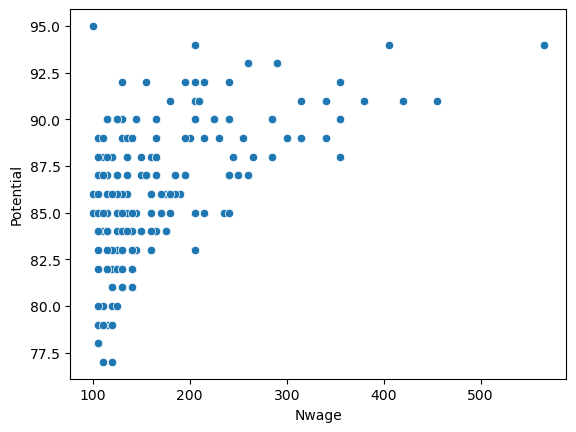

In [51]:
sns.scatterplot(x='Nwage',y='Potential',data=df)

<AxesSubplot:xlabel='Nwage', ylabel='International Reputation'>

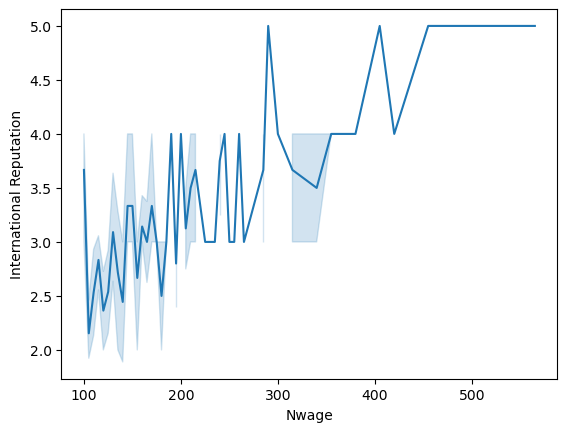

In [52]:
sns.lineplot(x='Nwage',y = 'International Reputation', data =df)

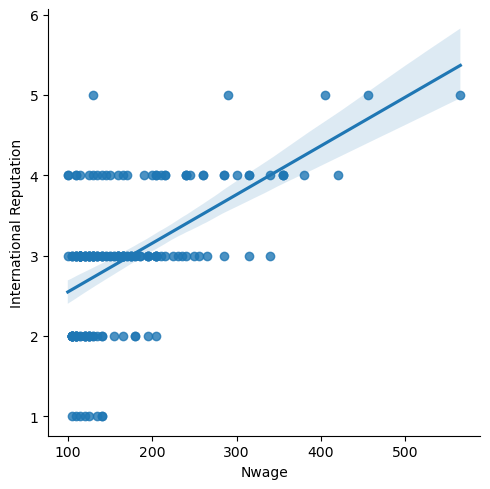

In [53]:
sns.lmplot(data=df,x='Nwage',y = 'International Reputation')

<AxesSubplot:xlabel='Nwage', ylabel='Age'>

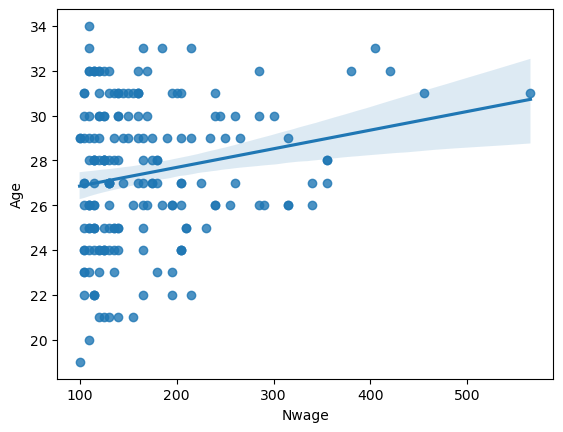

In [55]:
sns.regplot(data=df,x='Nwage',y = 'Age')

<AxesSubplot:xlabel='Nwage', ylabel='Count'>

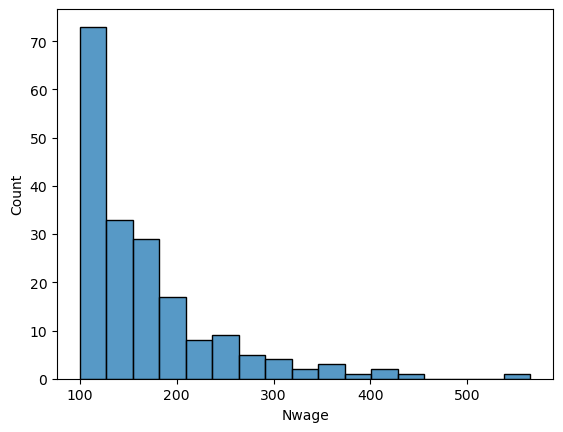

In [59]:
sns.histplot(df.Nwage)

<AxesSubplot:xlabel='Acceleration', ylabel='Density'>

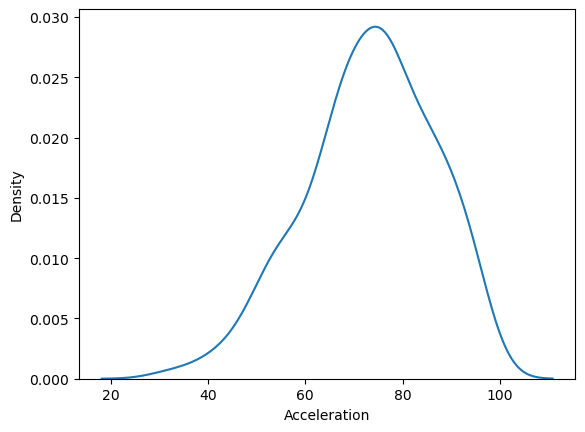

In [62]:
sns.kdeplot(df["Acceleration"])

<AxesSubplot:>

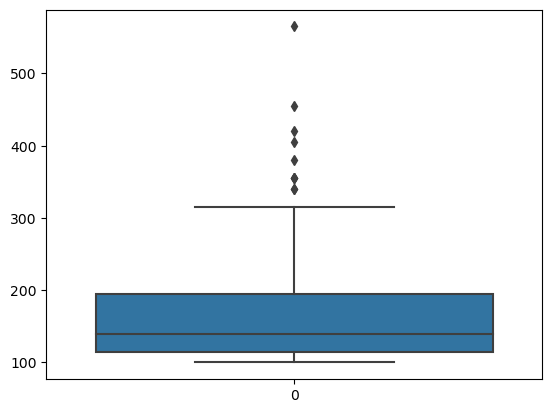

In [65]:
sns.boxplot(df['Nwage'])

In [84]:
# 나이대 범주화
import warnings
warnings.filterwarnings('ignore')

def get_category(age):
    
    cat = ''
    if age < 20: cat = '10'
    elif age < 30: cat = '20'
    else : cat = '30'
    return cat


df['Age_cat'] = df.Age.apply(lambda x :get_category(x))
df['Age_cat'].head()

0    30
1    30
2    20
3    20
4    20
Name: Age_cat, dtype: object

In [72]:
df.Age.describe()

count    188.000000
mean      27.420213
std        3.187378
min       19.000000
25%       25.000000
50%       27.500000
75%       30.000000
max       34.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age_cat', ylabel='Acceleration'>

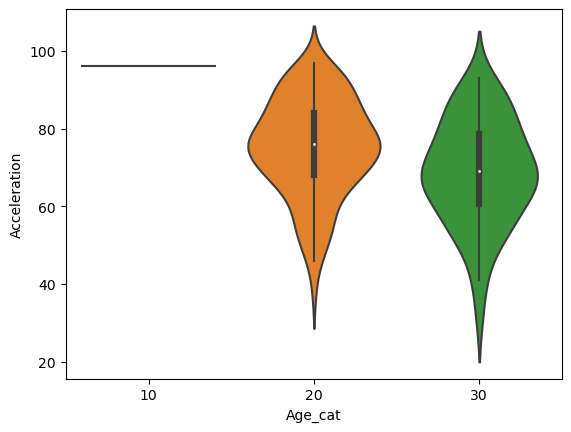

In [87]:
sns.violinplot(x ='Age_cat', y = 'Acceleration',order = ['10','20','30'],data=df)

<AxesSubplot:xlabel='Age_cat', ylabel='Penalties'>

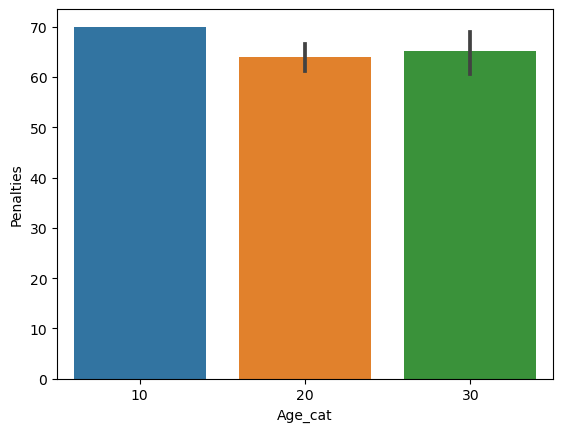

In [92]:
sns.barplot(x = "Age_cat", y = "Penalties",order = ['10','20','30'], data=df)


# 오차막대, 

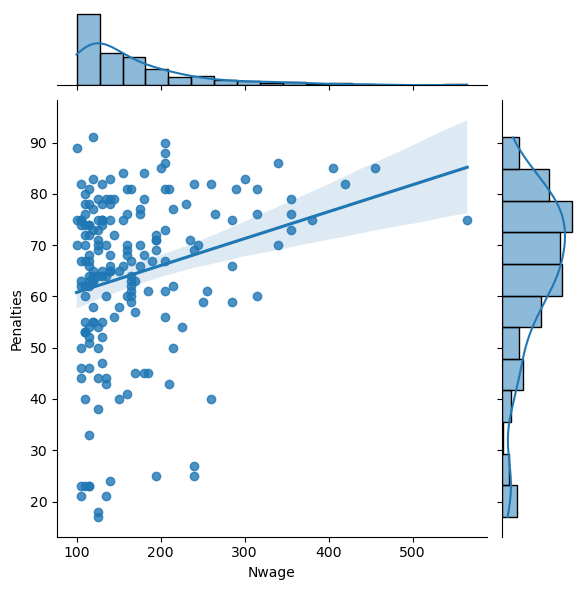

In [93]:
sns.jointplot(data=df, x='Nwage', y='Penalties', kind ='reg')

<AxesSubplot:>

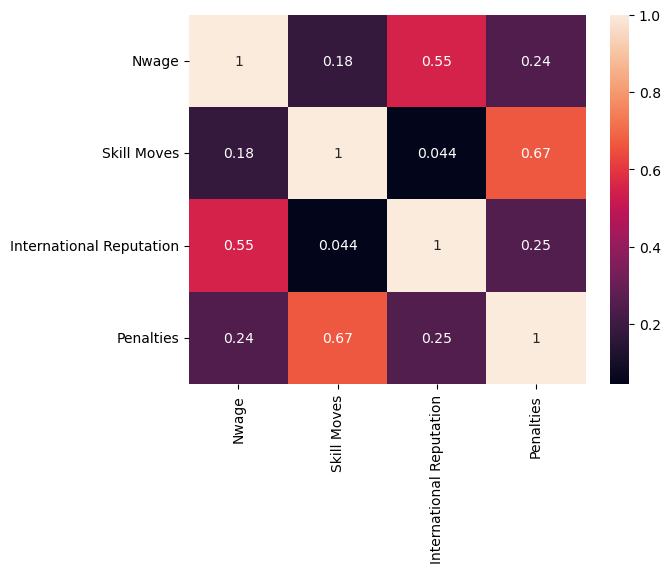

In [97]:
sns.heatmap(df[['Nwage','Skill Moves','International Reputation','Penalties']].corr(),annot=True)